# Introduction to Astronomy - Tutorial 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
lamb, flux, flux_err, cont = np.loadtxt("Resources/test_fort.17", 
            usecols=(0,1,2,3), 
            unpack=True, 
            skiprows=1, 
            comments='!'
            )

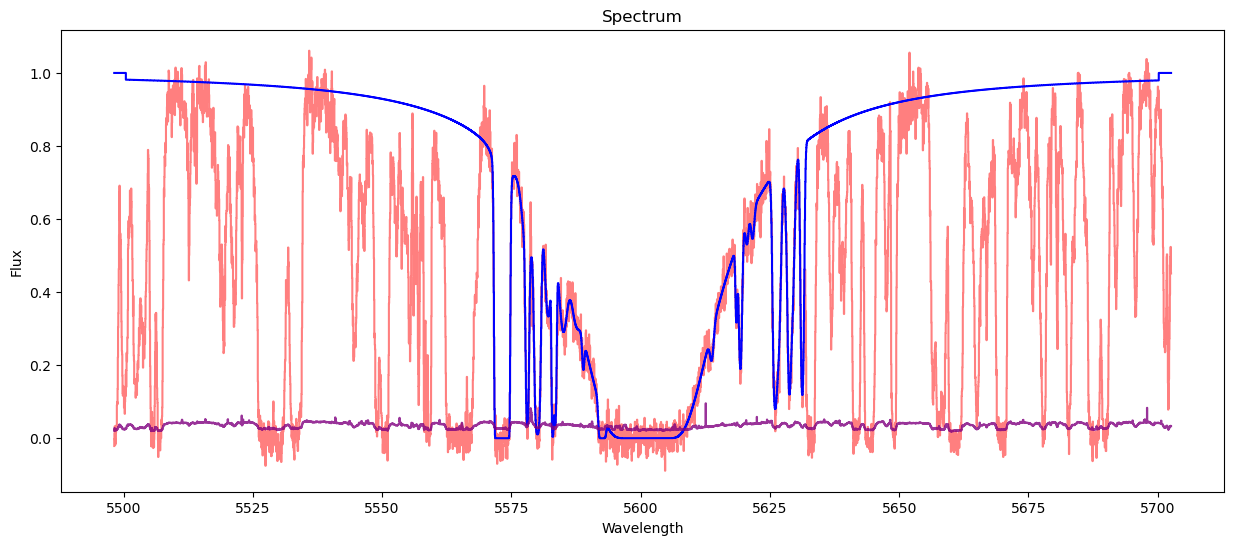

In [15]:
plt.figure(figsize=(15,6))
plt.step(lamb, flux, color='red', alpha=0.5)
plt.step(lamb, cont, color='blue')
plt.step(lamb, flux_err, color='purple', alpha=0.8)
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.title("Spectrum")
plt.show()

In [16]:
import astropy
from astropy import units as u
from astropy.io import fits

In [17]:
f = fits.open("Resources/test_spec.fits")
f.info()

Filename: Resources/test_spec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   (3721,)   float32   
  1                1 ImageHDU        15   (3721,)   float32   


In [18]:
f[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                 3721                                                  
EXTEND  =                    T                                                  
BUNIT   = '10**(-20)*erg/s/cm**2/Angstrom'                                      
OBJECT  = 'Test_spectra_for_GS25' / Name of the spectrum                        
DATE    = '2023-05-12 10:37:40.551064' / Date FITS file was generated           
AUTHOR  = 'Eshita Banerjee'    / Author of this spectrum                        
CRPIX1  =                  1.0                                                  
CRVAL1  =               4700.0                                                  
CDELT1  =                 1.25                                                  
CUNIT1  = 'Angstrom'        

In [19]:
d = f[0].data
hdr = f[0].header
type(d), d.shape

(numpy.ndarray, (3721,))

In [20]:
initial_lambda = hdr['CRVAL1']
delta_lambda = hdr['CDELT1']
nPixels = hdr['NAXIS1']

wavelength = (initial_lambda) + (delta_lambda * np.arange(nPixels))

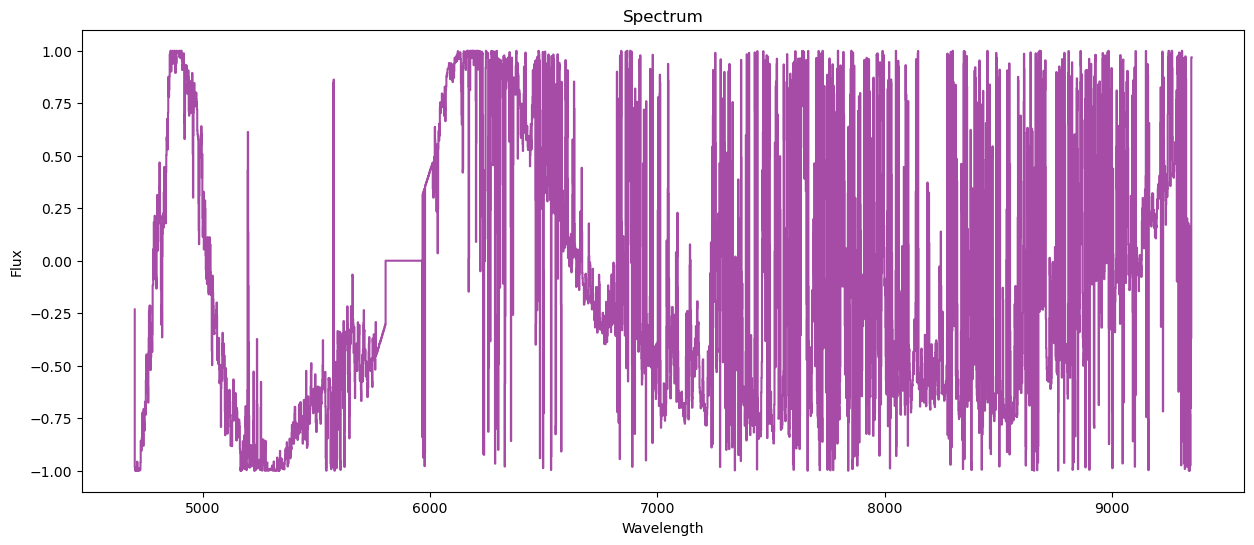

In [21]:
plt.figure(figsize=(15,6))
plt.step(wavelength, d, color='purple', alpha=0.7)
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.title("Spectrum")
plt.show()

In [24]:
file1 = fits.open("Resources/HorseHead.fits")
file1.info()

Filename: Resources/HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


Image saved as horsehead_nebula.png


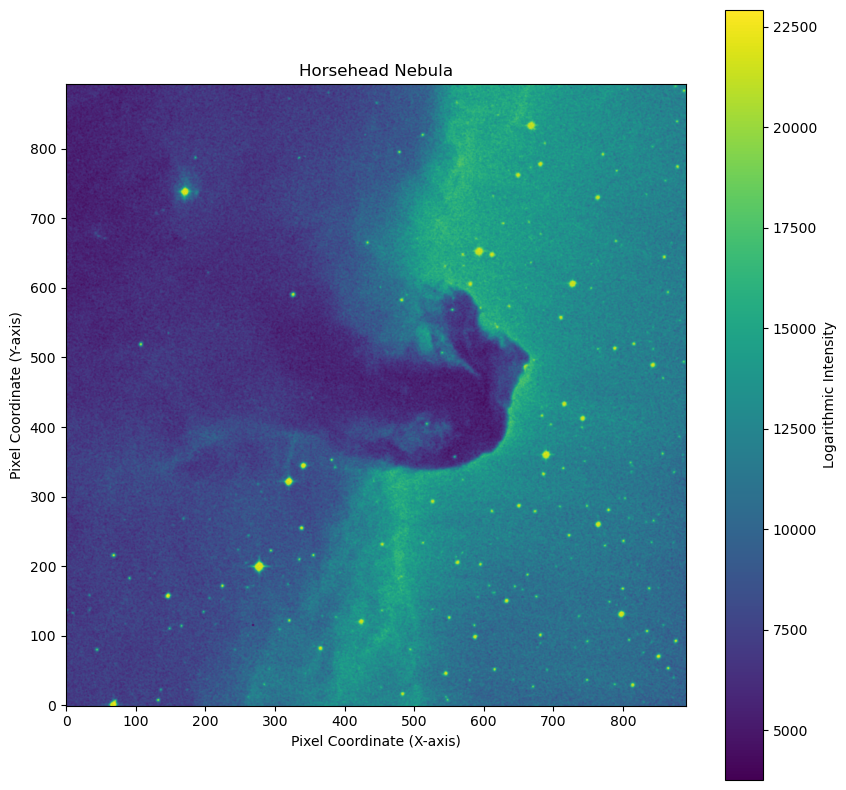

In [41]:
from astropy.wcs import WCS
# Open the FITS file
# The 'with' statement ensures the file is properly closed even if errors occur.
with fits.open("Resources/HorseHead.fits") as hdul:
    # Access the image data from the primary Header Data Unit (HDU)
    image_data = hdul[0].data

    # Display the image using matplotlib
    plt.figure(figsize=(10, 10))

    # Use a logarithmic scale to enhance contrast and see both faint and bright features.
    # Astronomical images often have a high dynamic range.
    plt.imshow(image_data, origin='lower')

    # Add a colorbar to show the mapping of pixel values to grayscale intensity
    plt.colorbar(label='Logarithmic Intensity')

    # Add a title and axis labels for context
    plt.title('Horsehead Nebula')
    plt.xlabel('Pixel Coordinate (X-axis)')
    plt.ylabel('Pixel Coordinate (Y-axis)')

    # Save the figure to a file
    plt.savefig('horsehead_nebula.png')

    print("Image saved as horsehead_nebula.png")

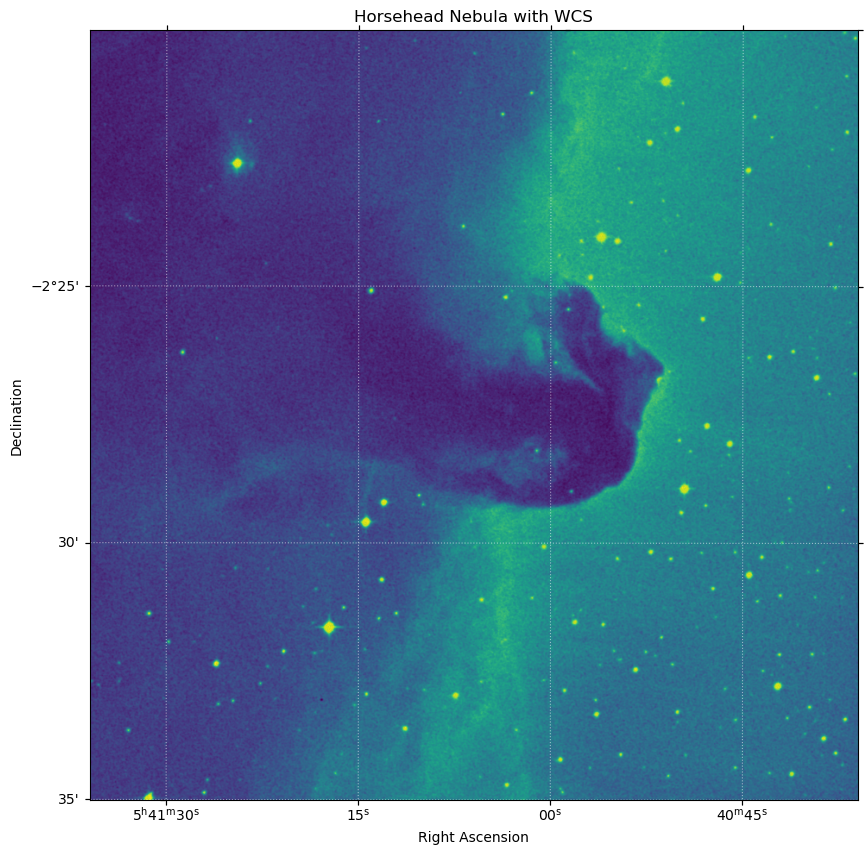

In [45]:
# Open the FITS file
with fits.open("Resources/HorseHead.fits") as hdul:
    wcs_info = WCS(hdul[0].header)
    image_data = hdul[0].data
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection=wcs_info)
    ax.imshow(image_data, origin='lower')
    ax.set_xlabel('Right Ascension')
    ax.set_ylabel('Declination')
    ax.set_title('Horsehead Nebula with WCS')
    ax.coords.grid(True, color='white', ls='dotted', alpha=0.5)
    plt.savefig('horsehead_nebula_wcs.png')

In [48]:
image_data = file1[0].data
arr1 = np.ravel(image_data)
